# Project 3, Problem 1: Missouri Demographic Study

### Using Esri's USA Tapestry Service for Counties, create a Python Notebook that answers the following questions:
1. For the counties in Missouri only, what is the dominant Tapestry LifeMode Group Name(TLIFENAME)? (10 points)
2. Create a histrogram that shows the number of Missouri counties per Tapestry LifeMode Group Name(TLIFENAME) (5 points)
3. Create a pie chart that shows the number of Missouri counties per Tapestry LifeMode Group Name(TLIFENAME) (5 points)
4. For the counties in Missouri, what is the dominant Dominant Tapestry Segment Name (TSEGNAME) (10 points)
5. Create a histogram that shows the number of Missouri counties per Tapestry Segment Name (TSEGNAME). (5 points)
6. Create a pie chart that shows the number of Missouri counties per Tapestry Segment Name (TSEGNAME). (5 points)
7. Is there Any correlation between LifeMode Group and Segment name? Hint: plot TSEGNAME' vs. TLIFENAME. (2 points)
8. Make sure the notebook is well-documented. (8 points)
9. Bonus Explore the data and show me somethig cool that I haven't thought of. (5 Points)

In [2]:
from arcgis.gis import GIS
gis = GIS("http://slustl.maps.arcgis.com/home", "laurenlovato_slustl")

Enter password: ········


### Access layer from feature service

In [3]:
from arcgis.features import FeatureLayer
lyr_url = 'http://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/Tapestry_Households/FeatureServer/1'
counties_lyr = FeatureLayer(lyr_url)
counties_lyr

<FeatureLayer url:"http://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/Tapestry_Households/FeatureServer/1">

### Query for just the counties in MO

In [4]:
query_MOco = counties_lyr.query(where='"ST_ABBREV"=\'MO\'')
len(query_MOco.features)

115

### Table of TLIFENAME

In [5]:
query_TLIFE = counties_lyr.query(where='"ST_ABBREV"=\'MO\'', out_fields='TLIFENAME')
query_TLIFE.df

,OBJECTID,TLIFENAME,SHAPE
0,1484,Middle Ground,"{'rings': [[[-10280362.7670118, 4916410.069564..."
1,1485,Cozy Country Living,"{'rings': [[[-10531483.9534014, 4884315.773069..."
2,1486,Cozy Country Living,"{'rings': [[[-10616987.3411962, 4950653.710427..."
3,1487,Hometown,"{'rings': [[[-10209994.3775193, 4770334.446140..."
4,1488,Rustic Outposts,"{'rings': [[[-10420742.210988, 4428344.5967196..."
5,1489,Cozy Country Living,"{'rings': [[[-10472244.1734035, 4528665.856542..."
6,1490,Cozy Country Living,"{'rings': [[[-10471351.390976, 4642762.9568824..."
7,1491,Cozy Country Living,"{'rings': [[[-10360213.3509528, 4654569.976182..."
8,1492,Rustic Outposts,"{'rings': [[[-10003900.8116267, 4456719.049613..."
9,1493,Middle Ground,"{'rings': [[[-10276399.9044591, 4757035.729460..."


In [6]:
import pandas as pd

In [7]:
new_sdf = query_TLIFE.df
new_sdf['TLIFENAME'].mode()

0    Cozy Country Living
dtype: object

### 1. Dominant Tapestry LifeMode Group Name(TLIFENAME) is Cozy Country Living

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
new_sdf['TLIFENAME'].value_counts()

Cozy Country Living      49
Rustic Outposts          37
Hometown                  9
Family Landscapes         9
Middle Ground             4
GenXurban                 4
Scholars and Patriots     2
Senior Styles             1
Name: TLIFENAME, dtype: int64

### 2. Create a histrogram (bar chart) that shows the number of Missouri counties per Tapestry LifeMode Group Name(TLIFENAME)

<BarContainer object of 8 artists>

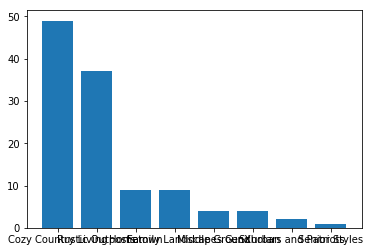

In [114]:
tlife = new_sdf['TLIFENAME'].value_counts()
label = ['Cozy Country Living', 'Rustic Outposts', 'Hometown', 'Family Landscapes', 'Middle Ground', 'GenXurban', 'Scholars and Patriots', 'Senior Styles']
plt.bar(label, height=tlife)

In [ ]:
#fl=FeatureLayer(country_url)
#sdf=fl.query(return_all_records=True).df

#sp_rel = "esriSpatialIntersects"
#sp_filter = filters.intersects(geometry-mo_geom)

#sdf['TLIFENAME'].mode
#.value_counts()

#(new_sdf['TLIFENAME'].value_counts()).hist()
#tlifey = new_sdf['TLIFENAME'].values

### 3. Create a pie chart that shows the number of Missouri counties per Tapestry LifeMode Group Name(TLIFENAME)

([<matplotlib.patches.Wedge at 0x21f54228f98>,
 [Text(0.253136,1.07048,'Cozy Country Living'),
  Text(-0.939861,-0.571542,'Rustic Outposts'),
  Text(0.253136,-1.07048,'Hometown'),
  Text(0.728569,-0.824128,'Family Landscapes'),
  Text(0.96967,-0.519364,'Middle Ground'),
  Text(1.05921,-0.296776,'GenXurban'),
  Text(1.09344,-0.119961,'Scholars and Patriots'),
  Text(1.09959,-0.0300462,'Senior Styles')])

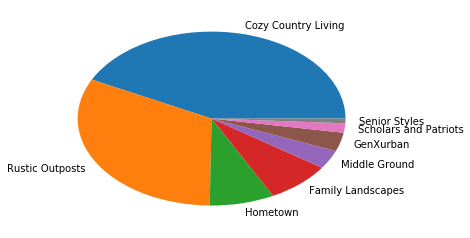

In [110]:
piech = new_sdf['TLIFENAME'].value_counts()
label = ['Cozy Country Living', 'Rustic Outposts', 'Hometown', 'Family Landscapes', 'Middle Ground', 'GenXurban', 'Scholars and Patriots', 'Senior Styles']
plt.pie(piech, labels=label)

### Table of TSEGNAME

In [115]:
query_TSEG = counties_lyr.query(where='"ST_ABBREV"=\'MO\'', out_fields='TSEGNAME')
query_TSEG.df

,OBJECTID,TSEGNAME,SHAPE
0,1484,Old and Newcomers,"{'rings': [[[-10280362.7670118, 4916410.069564..."
1,1485,Heartland Communities,"{'rings': [[[-10531483.9534014, 4884315.773069..."
2,1486,Prairie Living,"{'rings': [[[-10616987.3411962, 4950653.710427..."
3,1487,Small Town Simplicity,"{'rings': [[[-10209994.3775193, 4770334.446140..."
4,1488,Southern Satellites,"{'rings': [[[-10420742.210988, 4428344.5967196..."
5,1489,Heartland Communities,"{'rings': [[[-10472244.1734035, 4528665.856542..."
6,1490,Prairie Living,"{'rings': [[[-10471351.390976, 4642762.9568824..."
7,1491,Rural Resort Dwellers,"{'rings': [[[-10360213.3509528, 4654569.976182..."
8,1492,Rooted Rural,"{'rings': [[[-10003900.8116267, 4456719.049613..."
9,1493,Bright Young Professionals,"{'rings': [[[-10276399.9044591, 4757035.729460..."


### 4. For the counties in Missouri, what is the dominant Dominant Tapestry Segment Name (TSEGNAME)?

In [116]:
new_sdf2 = query_TSEG.df
new_sdf2['TSEGNAME'].mode()

0    Rooted Rural
dtype: object

In [117]:
new_sdf2['TSEGNAME'].value_counts()

Rooted Rural                  27
Heartland Communities         16
Prairie Living                16
Salt of the Earth              9
Middleburg                     8
Southern Satellites            8
Small Town Simplicity          6
Rural Resort Dwellers          4
Green Acres                    4
Old and Newcomers              2
Rural Bypasses                 2
Rustbelt Traditions            2
College Towns                  2
Traditional Living             2
Midlife Constants              2
Emerald City                   1
Soccer Moms                    1
Family Foundations             1
Bright Young Professionals     1
Senior Escapes                 1
Name: TSEGNAME, dtype: int64

### Dominant TSEGNAME is Rooted Rural

### 5. Create a histogram (bar chart) that shows the number of Missouri counties per Tapestry Segment Name (TSEGNAME)

<BarContainer object of 20 artists>

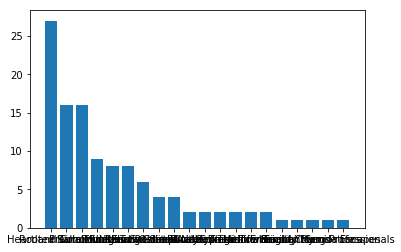

In [119]:
tseg = new_sdf2['TSEGNAME'].value_counts()
label2 = ['Rooted Rural', 'Heartland Communities', 'Prairie Living', 'Salt of the Earth', 'Middleburg', 'Southern Satellites', 
         'Small Town Simplicity', 'Rural Resort Dwellers', 'Green Acres', 'Old and Newcomers', 'Rural Bypasses',
         'Rustbelt Traditions', 'College Towns', 'Traditional Living', 'Midlife Constants', 'Emerald City', 'Soccer Moms',
         'Family Foundations', 'Bright Young Professionals', 'Senior Escapes']
plt.bar(label2, height=tseg)

### 6. Create a pie chart that shows the number of Missouri counties per Tapestry Segment Name (TSEGNAME)

([<matplotlib.patches.Wedge at 0x21f5441e048>,
 [Text(0.8141,0.739758,'Rooted Rural'),
  Text(-0.368368,1.03649,'Heartland Communities'),
  Text(-1.03136,0.38249,'Prairie Living'),
  Text(-1.04142,-0.354176,'Salt of the Earth'),
  Text(-0.772487,-0.783111,'Middleburg'),
  Text(-0.368368,-1.03649,'Southern Satellites'),
  Text(0.0450623,-1.09908,'Small Town Simplicity'),
  Text(0.339919,-1.04616,'Rural Resort Dwellers'),
  Text(0.558652,-0.94758,'Green Acres'),
  Text(0.705787,-0.843721,'Old and Newcomers'),
  Text(0.793589,-0.761719,'Rural Bypasses'),
  Text(0.871926,-0.670631,'Rustbelt Traditions'),
  Text(0.939861,-0.571543,'College Towns'),
  Text(0.996585,-0.465637,'Traditional Living'),
  Text(1.04142,-0.354176,'Midlife Constants'),
  Text(1.06692,-0.267734,'Emerald City'),
  Text(1.07995,-0.209071,'Soccer Moms'),
  Text(1.08975,-0.149784,'Family Foundations'),
  Text(1.09631,-0.0900494,'Bright Young Professionals'),
  Text(1.09959,-0.0300465,'Senior Escapes')])

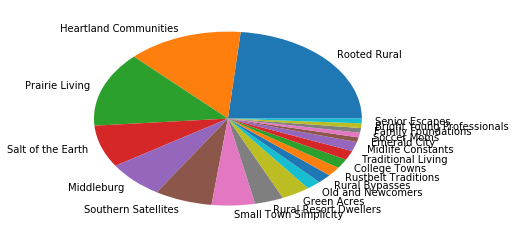

In [120]:
plt.pie(tseg, labels=label2)

### 7. Is there Any correlation between LifeMode Group and Segment name? (Hint: plot TSEGNAME vs. TLIFENAME)

ValueError: x and y must be the same size

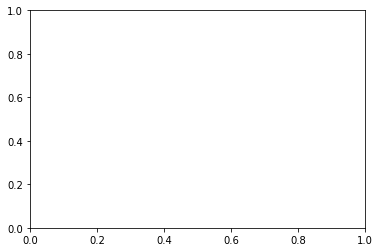

In [127]:
plt.scatter(tlife, tseg)